In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
# import os

In [18]:
# Load Image 

def read_file(filename):
    img = cv2.imread(filename)
    if img is None:
        print("Image Not Found. Please Recheck!")
        sys.exit()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [19]:
# Create Edge Mask

def edge_mask(img, line_width, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    img_edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_width, blur_value)
    return img_edges

In [20]:
# Reduce the Color Pallete
def color_quantization(img, k):
    
    #Image transformation to work on it    
    data = np.asarray(img, dtype=float).reshape((-1,3))
    data = np.float32(data)

    #Determining Criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    # Implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

In [21]:
#Combine Edge Mask with Quantized Image

def cartoonize(a,b):
    c = cv2.bitwise_and(a, a, mask=b)
    return c

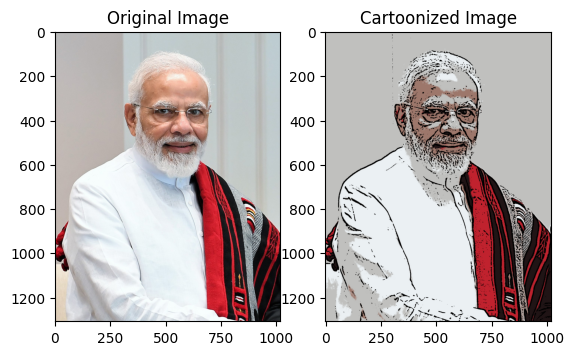

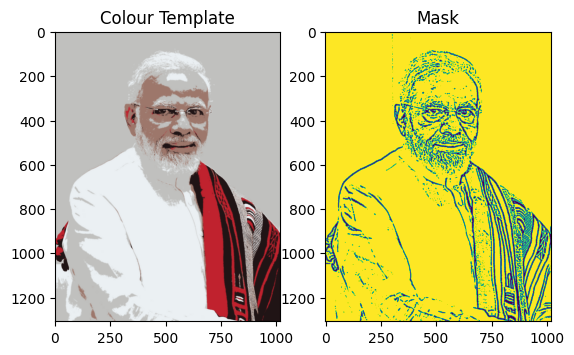

In [30]:
lineWidth, blurValue, totalColours = 13, 5, 5
# The above values can be changed depending upon the size of image

filename = './testimage.jpg'
# Note that the image uploaded in the directory MUST be in .jpg format

img = read_file(filename)
img_edges = edge_mask(img, lineWidth, blurValue)
# plt.imshow(img_edges)

quantized_img = color_quantization(img, totalColours)
# plt.imshow(quantized_img)
blurred = cv2.bilateralFilter(quantized_img, d=7, sigmaColor=200, sigmaSpace=200)
# plt.imshow(blurred)

cartoon = cartoonize(blurred, img_edges)

plt.subplot(1,2,1); plt.imshow(img); plt.title("Original Image")
plt.subplot(1,2,2); plt.imshow(cartoon); plt.title("Cartoonized Image")
plt.show()
plt.subplot(1,2,1); plt.imshow(blurred); plt.title("Colour Template")
plt.subplot(1,2,2); plt.imshow(img_edges); plt.title("Mask")
plt.show()

In [31]:
cartoon_export = cv2.cvtColor(cartoon, cv2.COLOR_RGB2BGR)
cv2.imwrite("Cartoonized_Image.jpg", cartoon_export)

True